### 1번 
데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv     
데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기 

### 1-1 EDA 및 데이터 전처리
시각화 및 통계량 제시

In [2]:
import pandas as pd
from urllib.parse import quote

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem1.csv'
encoded_url1 = quote(url1, safe=':/')

df1 = pd.read_csv(encoded_url1, encoding='utf-8')
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [5]:
df1.info()
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# YearBuilt: Original construction date
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# YearRemodAdd: Remodel date ======> 원핫인코딩
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


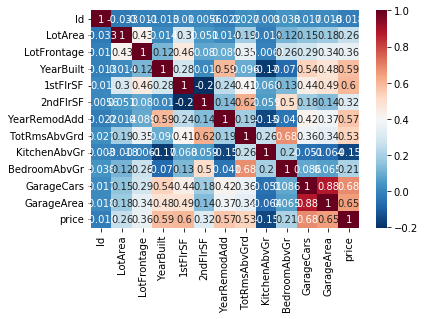

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 다중공선성 확인
# GarageArea 와 GarageCars 상관계수 0.88 로 다중공선성 존재함 --> 이 중에 target변수인 'price' 와 연관성이 높은 GarageCars 남김
df1_corr = df1.corr(method='pearson')
sns.heatmap(df1_corr, xticklabels = df1_corr.columns, yticklabels = df1_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

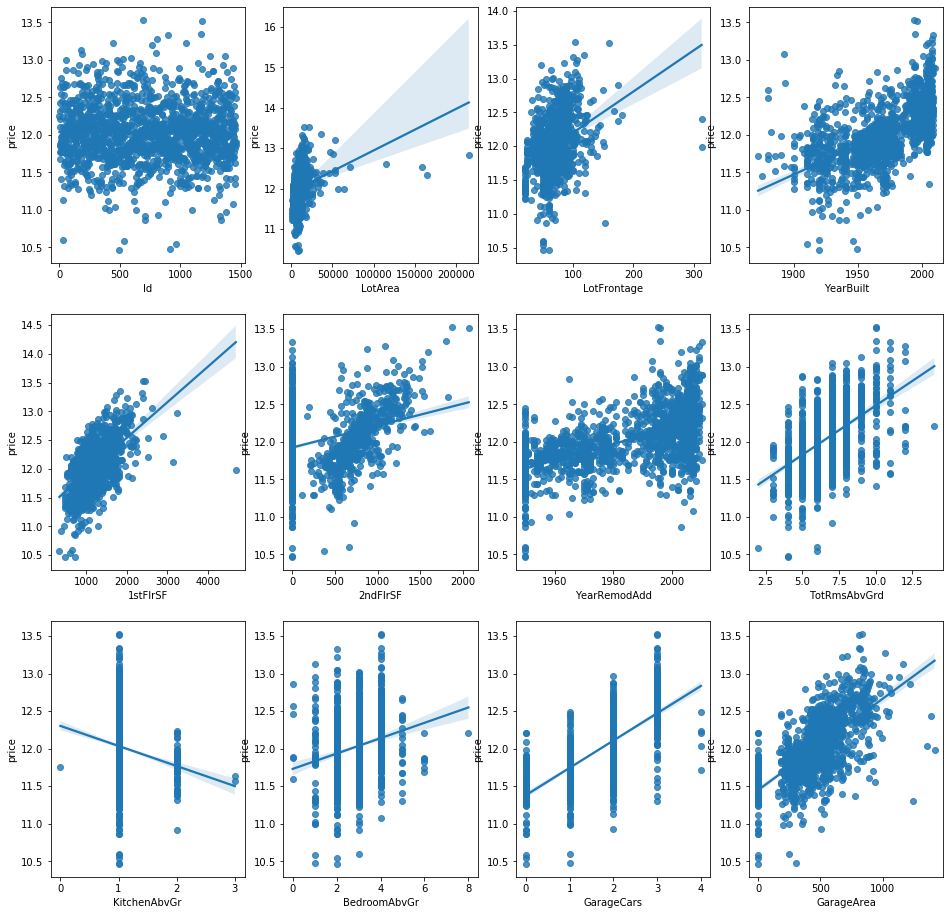

In [6]:
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=3)
lm_features = df1.columns[:-1]

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='price', data=df1, ax=axs[row][col])

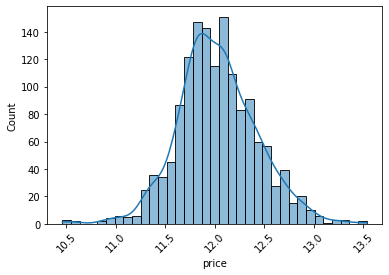

In [7]:
# 1) 타깃값의 분포 정규분포인지 확인 -> 정규분포
plt.xticks(rotation=45)
sns.histplot(df1['price'], kde=True)
plt.show()

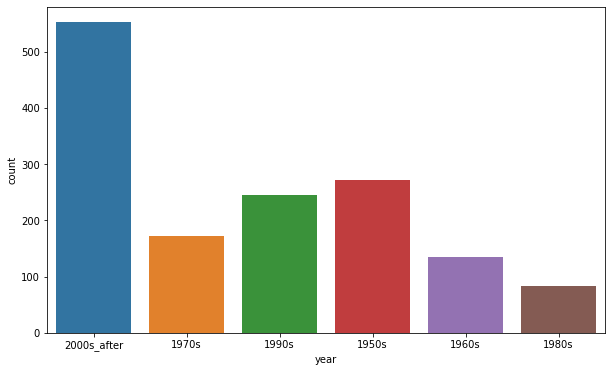

In [106]:
def get_category(year):
    cat =''
    if year < 1950 : cat = '1950s_before'
    elif year < 1960 : cat = '1950s'
    elif year < 1970 : cat = '1960s'
    elif year < 1980 : cat = '1970s'
    elif year < 1990 : cat = '1980s'
    elif year < 2000 : cat = '1990s'
    else : cat = '2000s_after'
    return cat

# 막대그래프 크기 figure 더 크게 설정
plt.figure(figsize=(10,6))

# lambda식으로 get_category() 함수 적용
df1['year'] = df1['YearRemodAdd'].apply(lambda x:get_category(x))
sns.countplot(x='year',data = df1)

In [107]:
df1_feature = df1.drop(['Id','GarageArea','YearRemodAdd'],axis=1)

In [108]:
## 로그변환
feature = ['LotArea', 'LotFrontage', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
       'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr',
       'GarageCars','price']

for i in feature:
    df1_feature[i] = np.log1p(df1_feature[i])

In [109]:
df1_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   LotFrontage   1201 non-null   float64
 2   YearBuilt     1460 non-null   float64
 3   1stFlrSF      1460 non-null   float64
 4   2ndFlrSF      1460 non-null   float64
 5   TotRmsAbvGrd  1460 non-null   float64
 6   KitchenAbvGr  1460 non-null   float64
 7   BedroomAbvGr  1460 non-null   float64
 8   GarageCars    1460 non-null   float64
 9   price         1460 non-null   float64
 10  year          1460 non-null   object 
dtypes: float64(10), object(1)
memory usage: 125.6+ KB


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

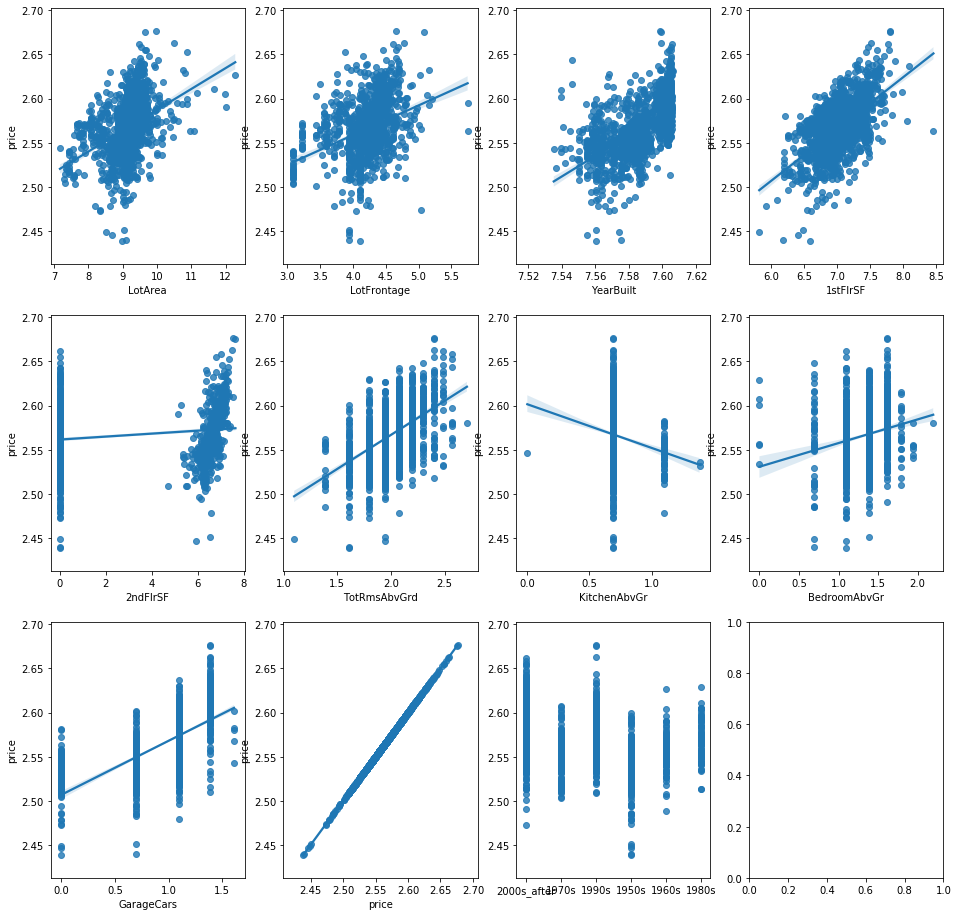

In [110]:
## 로그변환 이후 plot
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=3)
lm_features = df1_feature.columns

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='price', data=df1_feature, ax=axs[row][col])

In [ ]:
df1_feature_ohe = pd.get_dummies(df1_feature)

### 1-2  Train,Valid,Test set으로 분할 및 시각화 제시

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1_feature_ohe.drop('price',axis=1), df1_feature_ohe['price'], test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

### 1-3  2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [362]:
# 회귀분석
from statsmodels.formula.api import ols
import statsmodels.api as am
import statsmodels.formula.api as smf

df1_feature_ohe.rename(columns = {'1stFlrSF' : 'firstFlrSF'}, inplace = True)
df1_feature_ohe.rename(columns = {'2ndFlrSF' : 'secondFlrSF'}, inplace = True)

model = smf.ols(formula = "price ~ LotArea + LotFrontage + YearBuilt + firstFlrSF + secondFlrSF \
                            + TotRmsAbvGrd + BedroomAbvGr + LotArea:LotFrontage\
                            + GarageCars+ year_1950s + year_1960s + year_1970s + year_1980s + year_1990s + year_2000s_after"\
                , data = df1_feature_ohe)
result = model.fit()
result.summary()


## summary
# 회귀모형 통계적으로 유의한가? = f통계량, p-value 
# 모형은 데이터를 얼마나 설명? adj R2 =  0.788
# 모형내의 회귀계수는 유의?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     320.2
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        11:23:48   Log-Likelihood:                 3372.2
No. Observations:                1201   AIC:                            -6714.
Df Residuals:                    1186   BIC:                            -6638.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9809      0.245     -8.098      0.000      -2.461      -1.501
LotArea                 0.0136      0.006      2.261      0.024       0.002       0.025
LotFrontage             0.0118      0.013      0.874      0.382      -0.015       0.038
YearBuilt               0.5807      0.036     15.996      0.000       0.509       0.652
firstFlrSF              0.0457      0.002     19.212      0.000       0.041       0.050
secondFlrSF             0.0032      0.000     13.752      0.000       0.003       0.004
TotRmsAbvGrd            0.0058      0.004      1.476      0.140      -0.002       0.014
BedroomAbvGr           -0.0060      0.003     -2.274      0.023      -0.011      -0.001
LotArea:LotFrontage    -0.0014      0.001     -0.917      0.359      -0.004       0.002
GarageCars              0.0157      0.002      9.523      0.000       0.012       0.019
year_1950s             -0.3370      0.040     -8.338      0.000      -0.416      -0.258
year_1960s             -0.3351      0.041     -8.234      0.000      -0.415      -0.255
year_1970s             -0.3338      0.041     -8.188      0.000      -0.414      -0.254
year_1980s             -0.3270      0.041     -8.012      0.000      -0.407      -0.247
year_1990s             -0.3250      0.041     -7.945      0.000      -0.405      -0.245
year_2000s_after       -0.3229      0.041     -7.858      0.000      -0.404      -0.242
==============================================================================
Omnibus:                      349.810   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2027.498
Skew:                          -1.218   Prob(JB):                         0.00
Kurtosis:                       8.881   Cond. No.                     1.26e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
## 단계적선택법


Index(['LotArea', 'LotFrontage', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
       'YearRemodAdd', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr',
       'GarageCars', 'price', 'year_1950s', 'year_1960s', 'year_1970s',
       'year_1980s', 'year_1990s', 'year_2000s_after'],
      dtype='object')

### 1-4 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

## 2번
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

### 2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라     

In [124]:
import pandas as pd
from urllib.parse import quote

url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem2.csv'
encoded_url2 = quote(url2, safe=':/')

df2 = pd.read_csv(encoded_url2, encoding='utf-8')
df2.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


In [132]:
# 시계열분석시 datetime 형식으로 변환
df2['date'] = pd.to_datetime(df2['date'], format="%Y-%m-%d")

# 인구대비 누적사망율구함
df2['rate'] = df2['total_deaths']/df2['population']

In [156]:
## 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가
df2.loc[df2['date']==df2['date'].max()].groupby(['location']).agg('max')['population'].sort_values(ascending=False)[:5]

location
World                  7.874966e+09
Asia                   4.678445e+09
Lower middle income    3.330653e+09
Upper middle income    2.513673e+09
China                  1.444216e+09
Name: population, dtype: float64

In [181]:
data = df2.loc[df2.location=='World']
# np.diff(data['total_deaths'],1)

Text(0.5, 0, 'daily_deaths')

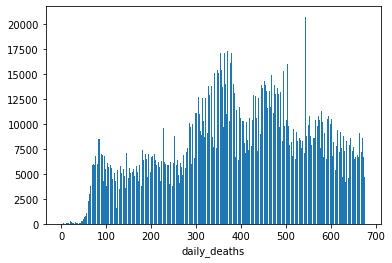

In [190]:
# figure = plt.figure()
# ax = plt.figure()
# x = np.array(np.diff(data['total_deaths'],1))
y = np.array(np.diff(data['total_deaths'],1))
plt.bar(range(len(y)), y,label='bar plot', label='daily_deaths')
# plt.bar(range(len(y)), y,label='bar plot', label='daily_deaths', color='green')
plt.legend()

<BarContainer object of 679 artists>

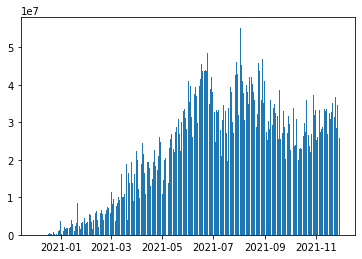

In [176]:
x = np.array(df2.loc[df2.location=='World','date'])
y = np.array(df2.loc[df2.location=='World','new_vaccinations'])

plt.bar(x,y,label='bar plot')

### 2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

In [219]:
## 코로나 위험지수

### 2-3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 각각 한개씩 만들어라)

In [291]:
# import pandas as pd
# data = [['Choi',22],['Kim',48],['Joo',32]]
# df = pd.DataFrame(data, columns=['Name','Age'])

kr = df2.loc[df2.location=='South Korea',].reset_index(drop=True).sort_values('date').fillna(method='bfill')
kr.set_index('date', inplace=True)

daily_cases = pd.DataFrame(np.diff(kr['total_cases'],1), index=kr.index[1:], columns=['daily_cases'])
daily_deaths = pd.DataFrame(np.diff(kr['total_deaths'],1), index=kr.index[1:], columns=['daily_deaths'])
daily_new_tests = pd.DataFrame(np.diff(kr['new_tests'],1), index=kr.index[1:], columns=['daily_new_tests'])
daily_new_vaccinations = pd.DataFrame(np.diff(kr['new_vaccinations'],1), index=kr.index[1:], columns=['daily_new_vaccinations'])

In [292]:
kr_final = pd.concat([daily_cases, daily_deaths, daily_new_tests, daily_new_vaccinations], axis=1)

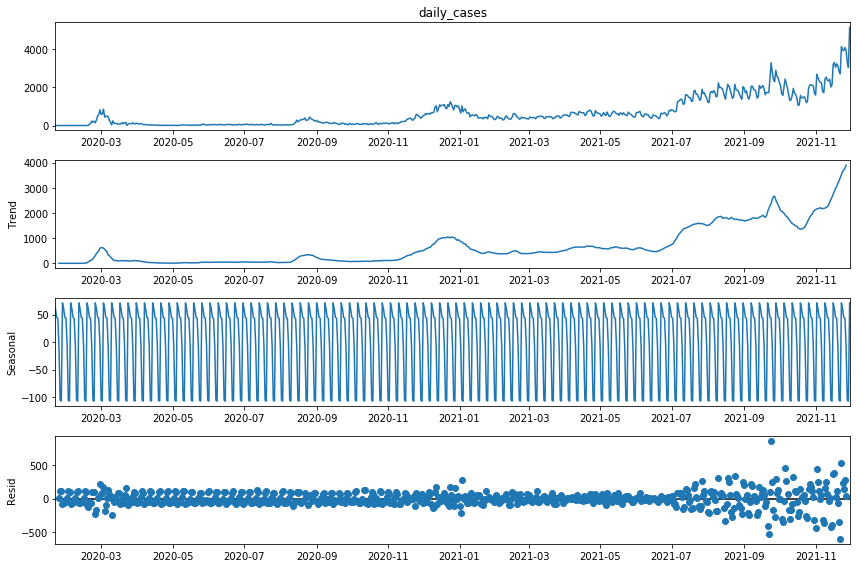

In [293]:
## 시계열 분해
# trend 와 seasonal 명확히 존재, 불규칙요인은 거의 없음
# --> 시간에 따른 데이터를 확인했으니, 시간에 따른 미래값을 예측하거나 현상 분석하는 방법 알아보기
from statsmodels.tsa.seasonal import seasonal_decompose


#  model='multipilcative' ==> 이건 언제씀?
ts = kr_final['daily_cases']
result = seasonal_decompose(ts)
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

In [276]:
# 1. 정상성검정 : Augmented Dickey-Fuller test : t test 사용
# H0:데잍터가 정상성(stationay)가지지 않음

from statsmodels.tsa.stattools import adfuller
# 2개의 관측값으로 이루어진 binary data를 배열형식으로, 관측값은 정수
# nc : 추세없음, c:상수항만사용, ct:상수항&1차추세, ctt:상수항&2차추세 --> 데이터추세안보이면 nc,c / 추세보이면 ct,ctt
# 이 데이터 우상향 트렌드보이므로 ct 사용 -> H0기각 정상성X ===> 정상시계열 변환필요
adf = adfuller(ts, regression='ct') 
print('ADF Statistic:{}'.format(adf[0]))
print('p-value:{}'.format(adf[1]))

ADF Statistic:0.6935399617213212
p-value:0.9970294729843961


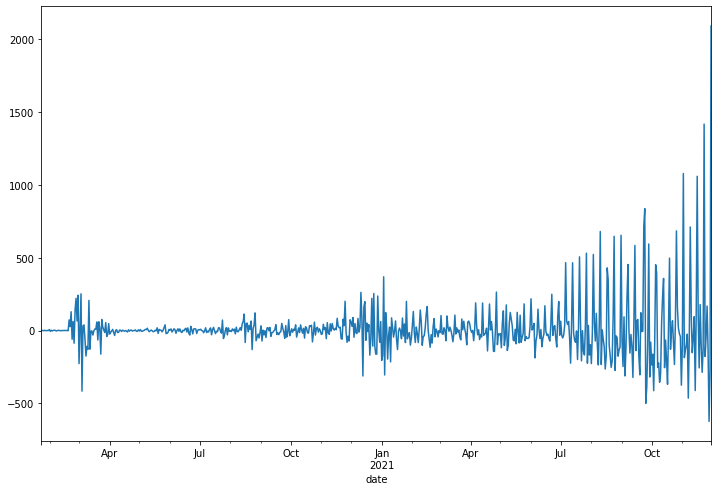

In [283]:
# 1차 차분
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff_data = ts.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [284]:
# adfuller default는 'c'(상수항만사용) : 1차 차분한 그래프가 트렌드보이지 않아 매개변수 'c' 사용하여 검정
# H0기각 : 정상성 따름
adf = adfuller(diff_data)
print('ADF Statistics:{}'.format(adf[0]))
print('p-value:{}'.format(adf[1]))

ADF Statistics:-3.628043340214871
p-value:0.005246984934401086


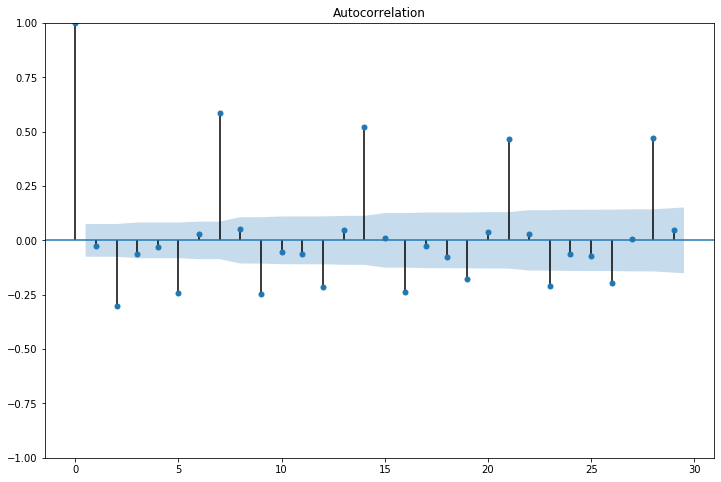

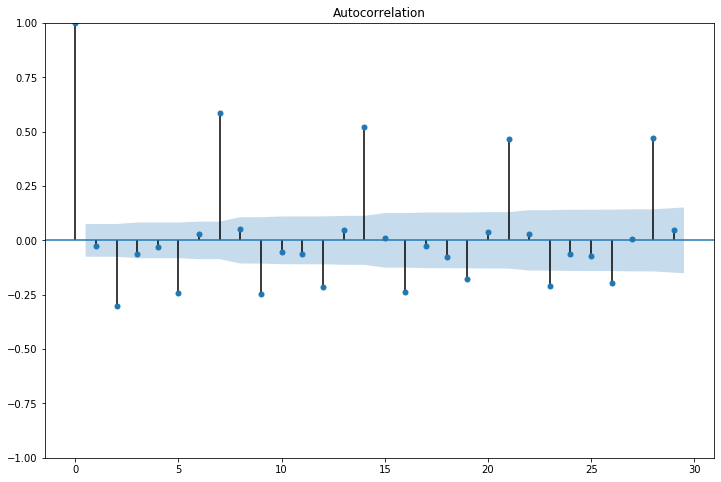

In [285]:
## 1. AR (Auto Regressive) : 자기회귀과정, 현시점의 데이터를 이전의 데이터들의 상관성으로 나타내는 모형
# 즉, 과거의 값이 현재의값에 얼마나 영향을 미쳤는지 파악하는 것, 과거값이 현재 영향안미치면 모형성능 낮아짐 
# --> 이때 최적성능찾는모델 만들수있는 과거값찾는데 이값을 p라고하고 AR(p)모형이라 함

# ACF 자기상관함수 : 시차에  따른 자기상관성 의미
# 비정상시계열 : ACF값 느리게 0에 접근하며 양수값가질수도
# 정상시계열 : ACF값 빠르게 0으로 수렴하고 0으로 수렴할때에 시차를 p값으로 설정

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data) # AR(p) 값 확인 가능 : 시차 5 이후에 0으로 수렴 p=5 ??

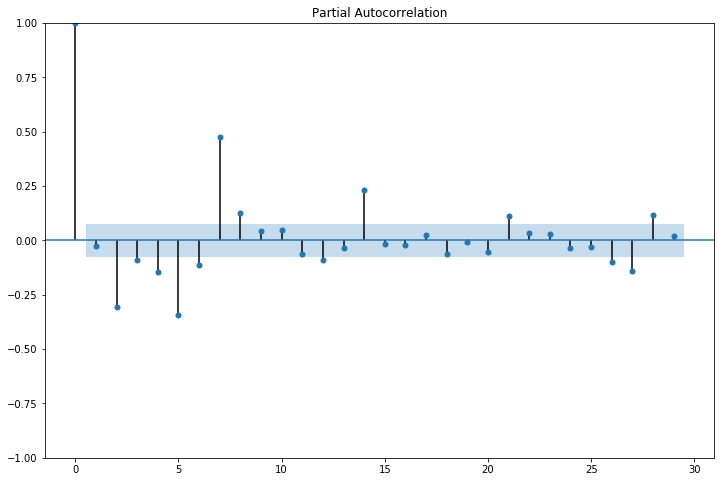

In [286]:
# 2. MA (Moving Average) : 과거 예측오차들의 가중이동평균으로 현재시점의 데이터를 표현하는 모델
# --> 과거의 예측 오차를 이용하여 미래를 예측하는 모형, 과거 예측오차들에 따라서 가중이동평균 달라짐
# pacf : 편자기상관함수. 시차가 다른 두시계열데이터간의 순수한 상호 연관성 나타냄
# acf : 과거 t시점까지의 데이터로 현재시점과의 상관성
# pacf : 과거 t시점의 데이터와 현재시점의 데이터의 연관성

plot_pacf(diff_data)
plt.show() # q = 6 ??

In [321]:
# date_div = pd.DataFrame(pd.date_range('2020-01-22', '2021-11-30'))
# date_div
# pd.concat([ts.reset_index(),date_div], axis=1).isnull().sum()

In [290]:
from statsmodels.tsa.arima.model import ARIMA
# arima (p,d,q)
model = ARIMA(ts, order=(5,2,6), trend='ct')
res = model.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: In models with integration (`d > 0`) or seasonal integration (`D > 0`), trend terms of lower order than `d + D` cannot be (as they would be eliminated due to the differencing operation). For example, a constant cannot be included in an ARIMA(1, 1, 1) model, but including a linear trend, which would have the same effect as fitting a constant to the differenced data, is allowed.

In [309]:
import itertools
p = range(0,7) 
d = range(0,1)
q = range(0,7)
# d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
dict_model = []
for i in pdq:
    try:
        model = ARIMA(ts, order=(i))
        print(i)
        model_fit = model.fit(maxiter=100)
        dict_model[i] = [model_fit.lif, model_fit.aic]
    except:
        print("error lag:",i)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(0, 0, 0)
error lag: (0, 0, 0)
(0, 0, 1)
error lag: (0, 0, 1)
(0, 0, 2)
error lag: (0, 0, 2)
(0, 0, 3)
error lag: (0, 0, 3)
(0, 0, 4)
error lag: (0, 0, 4)
(0, 0, 5)
error lag: (0, 0, 5)
(0, 0, 6)
error lag: (0, 0, 6)
(1, 0, 0)
error lag: (1, 0, 0)
(1, 0, 1)
error lag: (1, 0, 1)
(1, 0, 2)
error lag: (1, 0, 2)
(1, 0, 3)
error lag: (1, 0, 3)
(1, 0, 4)
error lag: (1, 0, 4)
(1, 0, 5)
error lag: (1, 0, 5)
(1, 0, 6)
error lag: (1, 0, 6)
(2, 0, 0)
error lag: (2, 0, 0)
(2, 0, 1)
error lag: (2, 0, 1)
(2, 0, 2)
error lag: (2, 0, 2)
(2, 0, 3)
error lag: (2, 0, 3)
(2, 0, 4)
error lag: (2, 0, 4)
(2, 0, 5)
error lag: (2, 0, 5)
(2, 0, 6)
error lag: (2, 0, 6)
(3, 0, 0)
error lag: (3, 0, 0)
(3, 0, 1)
error lag: (3, 0, 1)
(3, 0, 2)
error lag: (3, 0, 2)
(3, 0, 3)
error lag: (3, 0, 3)
(3, 0, 4)
error lag: (3, 0, 4)
(3, 0, 5)
error lag: (3, 0, 5)
(3, 0, 6)
error lag: (3, 0, 6)
(4, 0, 0)
error lag: (4, 0, 0)
(4, 0, 1)
error lag: (4, 0, 1)
(4, 0, 2)
error lag: (4, 0, 2)
(4, 0, 3)
error lag: (4, 0, 3)
(4, 0, 4

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [323]:
information=pd.DataFrame.from_dict(dict_model, orient='index', columns=['llf','AIC'])
information.loc[information['llf']==information['llf'].max()]
information.sort_values(by=['AIC'], ascending=True)

,llf,AIC


## 3번
설문조사 데이터      
데이터 출처 : 자체 제작    
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv 

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)    
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 
모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 역문항을 변환 한 후 각 그룹`(A~D)`의 영역`(Q1~Q5)`별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)

In [324]:
import pandas as pd
from urllib.parse import quote

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem3.csv'
encoded_url3 = quote(url3, safe=':/')

df3 = pd.read_csv(encoded_url3, encoding='utf-8')
df3.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


In [359]:
df3_final = df3.copy()
col_list = df3_final.columns[2:]

for i in col_list:
    if i.find("-3") == -1:
        df3_final[i] = df3_final[i] * 5
    else: df3_final[i] = df3_final[i] * -6

### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

### 3-3 탐색적 요인분석을 수행하고 결과를 시각화 하라